#### _Librerias utilizadas_

In [13]:
## Traemos las librerias empledas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y análisis datos

In [14]:
df = pd.read_csv(r"C:\Users\pablo\OneDrive\Documentos\HENRY\Proyecto\Inventory\SalesFINAL12312016.csv", parse_dates=['SalesDate'])  # Cargamos el dataset

In [15]:
df.shape #Analizamos la cantidad de filas y columnas del dataset

(1048575, 14)

In [16]:
df.info() # Información general (columnas, tipos de datos, nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

In [17]:
#Lista de columnas
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [18]:
#Analizamos los primeros 10 registros
df.head(10)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-15,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-22,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-30,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,4,59.96,14.99,2016-01-05,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,1,14.99,14.99,2016-01-06,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE


In [19]:
# Extraer valores únicos de Size
df['Size'].unique()[:20]  # muestra primeros 20

# Verificar consistencia entre Size y Volume
df[['Size', 'Volume']].drop_duplicates().head(20)

# Comparar si el texto de Size contiene el volumen
df['check_size'] = df['Size'].str.extract(r'(\d+)').astype(float)
consistencia = (df['check_size'] == df['Volume']).mean()
print(f"Coincidencia entre Size y Volume: {consistencia:.2%}")

Coincidencia entre Size y Volume: 72.93%


#### Revision de valores unicos

In [20]:
conteo_unicos = df.nunique()
print(conteo_unicos)

InventoryId       170131
Store                 79
Brand               7658
Description         6890
Size                  40
SalesQuantity        141
SalesDollars        3426
SalesPrice           273
SalesDate             60
Volume                22
Classification         2
ExciseTax            468
VendorNo             116
VendorName           117
check_size            19
dtype: int64


#### Revision de nulos y negativos

In [21]:
# Sumar nulos por columna
nulos_por_columna = df.isnull().sum()

# Filtrar solo las que tienen más de 0 nulos
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]

print(nulos_por_columna)

check_size    18946
dtype: int64


In [22]:
# Contar valores negativos por columna
negativos_por_columna = (df.select_dtypes(include=[np.number]) < 0).sum()

# Filtrar solo las columnas que tienen al menos un valor negativo
negativos_por_columna = negativos_por_columna[negativos_por_columna > 0]

print(negativos_por_columna)


Series([], dtype: int64)


El dataframe no tiene valores negativos

#### Revision de espacios y formato

In [23]:
#Revisamos si hay espacios en blanco al inicio o al final de las cadenas de texto
espacios = df.apply(lambda col: col.str.contains(r"^\s|\s$", regex=True) if col.dtype == "object" else False)
print(espacios.sum())

InventoryId            0
Store                  0
Brand                  0
Description            0
Size                   0
SalesQuantity          0
SalesDollars           0
SalesPrice             0
SalesDate              0
Volume                 0
Classification         0
ExciseTax              0
VendorNo               0
VendorName        957234
check_size             0
dtype: int64


In [24]:
# Revisamos la fecha de inicio y fin del dataset
fecha_inicio = df['SalesDate'].min()
fecha_fin = df['SalesDate'].max()

print(f"Fecha de inicio del dataset: {fecha_inicio}")
print(f"Fecha de fin del dataset: {fecha_fin}")

Fecha de inicio del dataset: 2016-01-01 00:00:00
Fecha de fin del dataset: 2016-02-29 00:00:00


## Análisis básico descriptivo

### Distribución general

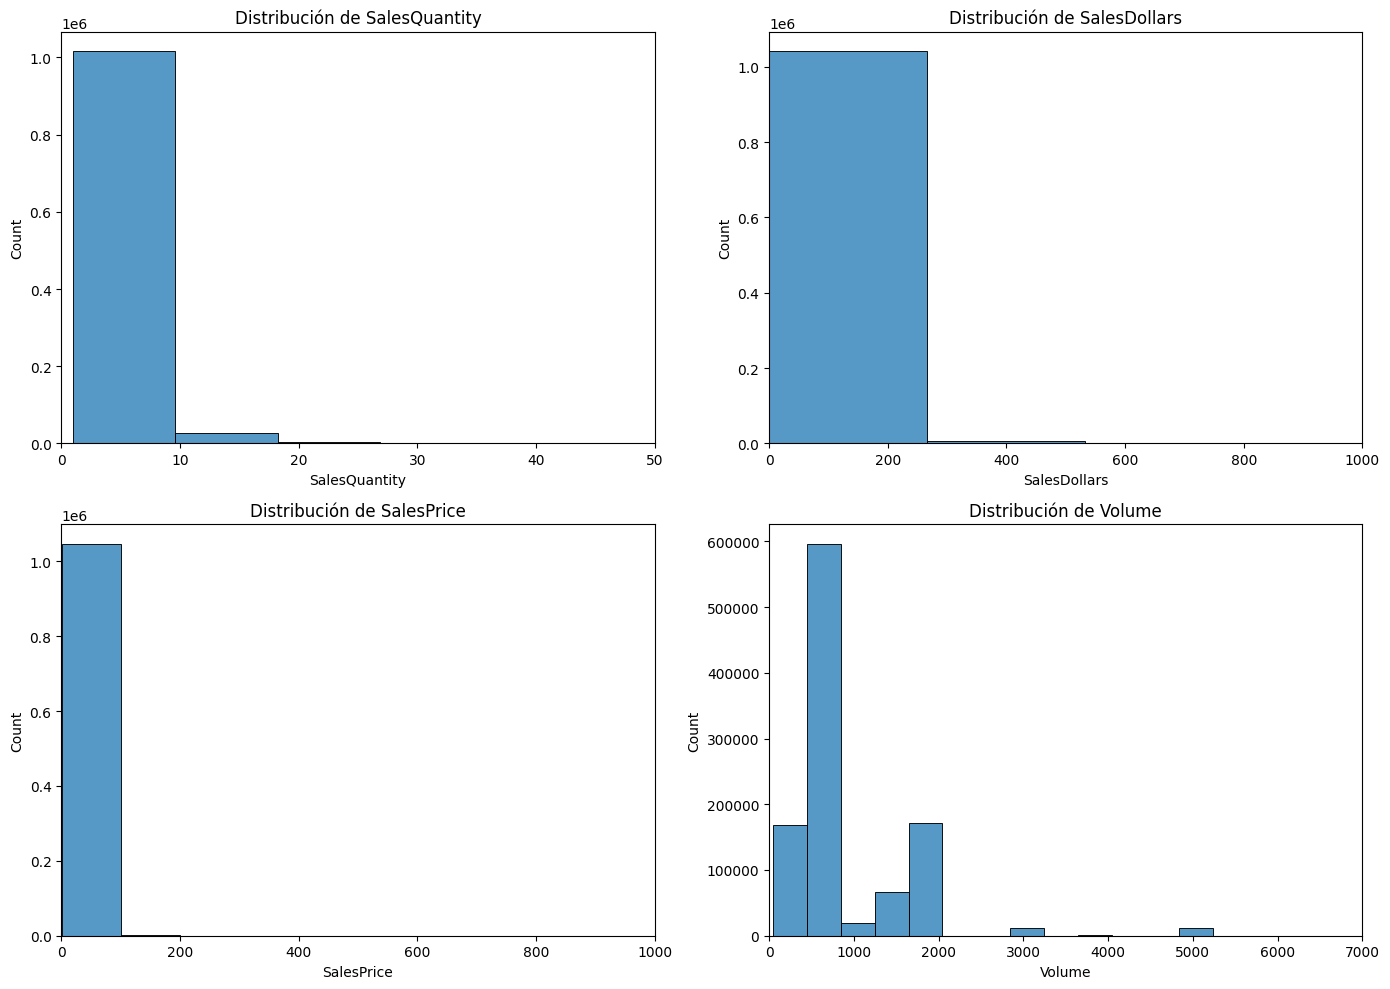

In [25]:
# Estadísticas descriptivas generales
df[['SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'ExciseTax']].describe()

# Histogramas con límites en el eje X
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['SalesQuantity'], bins=50, ax=axes[0,0], kde=False)
axes[0,0].set_title("Distribución de SalesQuantity")
axes[0,0].set_xlim(0, 50)   # límite ajustado

sns.histplot(df['SalesDollars'], bins=50, ax=axes[0,1], kde=False)
axes[0,1].set_title("Distribución de SalesDollars")
axes[0,1].set_xlim(0, 1000)  # límite ajustado

sns.histplot(df['SalesPrice'], bins=50, ax=axes[1,0], kde=False)
axes[1,0].set_title("Distribución de SalesPrice")
axes[1,0].set_xlim(0, 1000)  # límite ajustado

sns.histplot(df['Volume'], bins=50, ax=axes[1,1], kde=False)
axes[1,1].set_title("Distribución de Volume")
axes[1,1].set_xlim(0, 7000) # límite ajustado

plt.tight_layout()
plt.show()

### Top-N análisis

C:\Users\pablo\AppData\Local\Temp\ipykernel_1656\4062795236.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


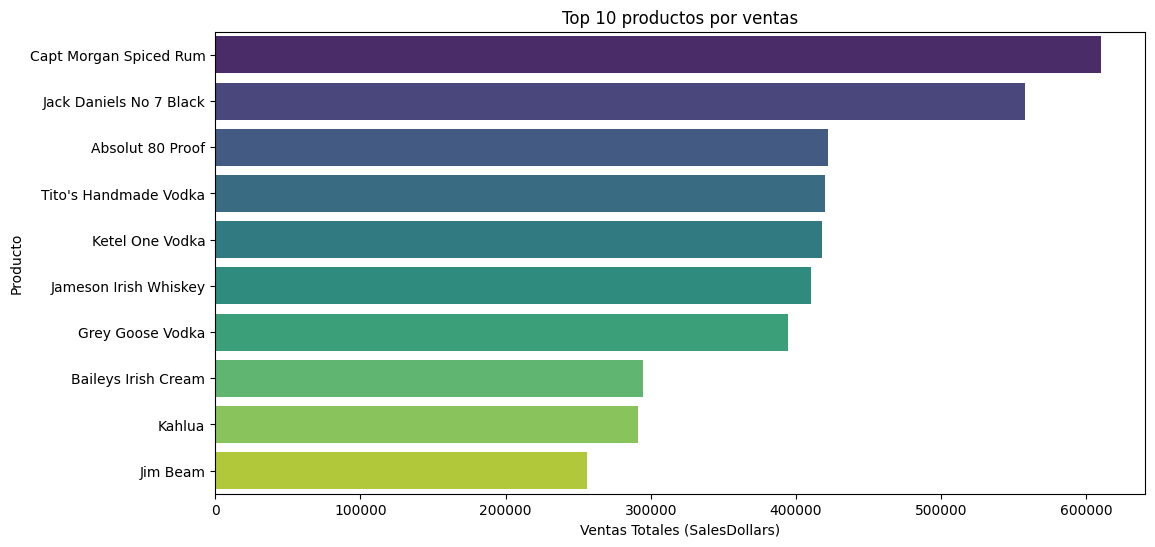

C:\Users\pablo\AppData\Local\Temp\ipykernel_1656\4062795236.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")


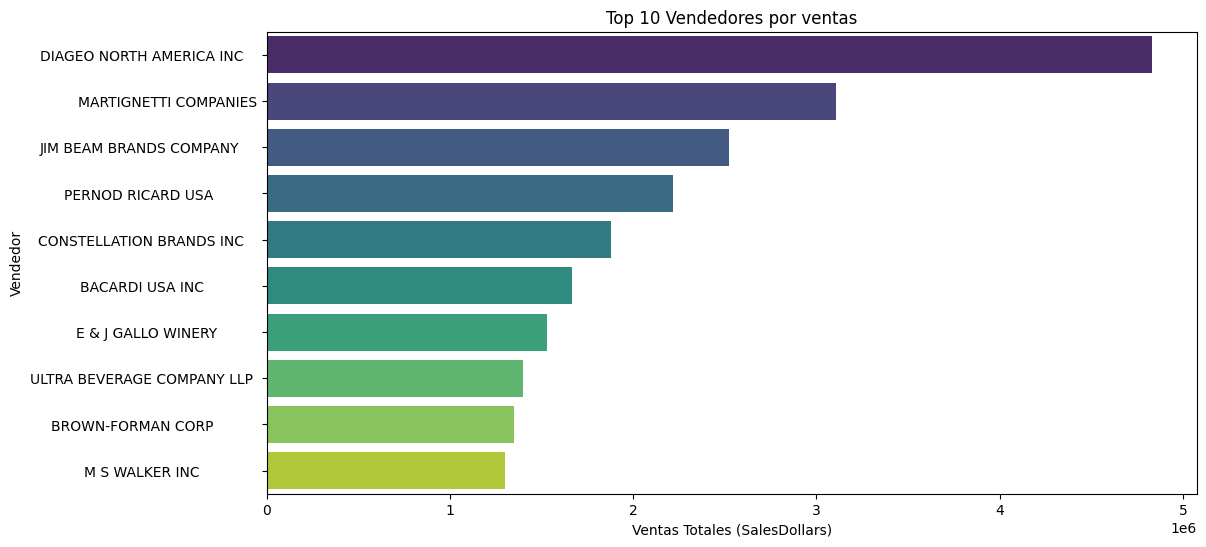

C:\Users\pablo\AppData\Local\Temp\ipykernel_1656\4062795236.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette="viridis")


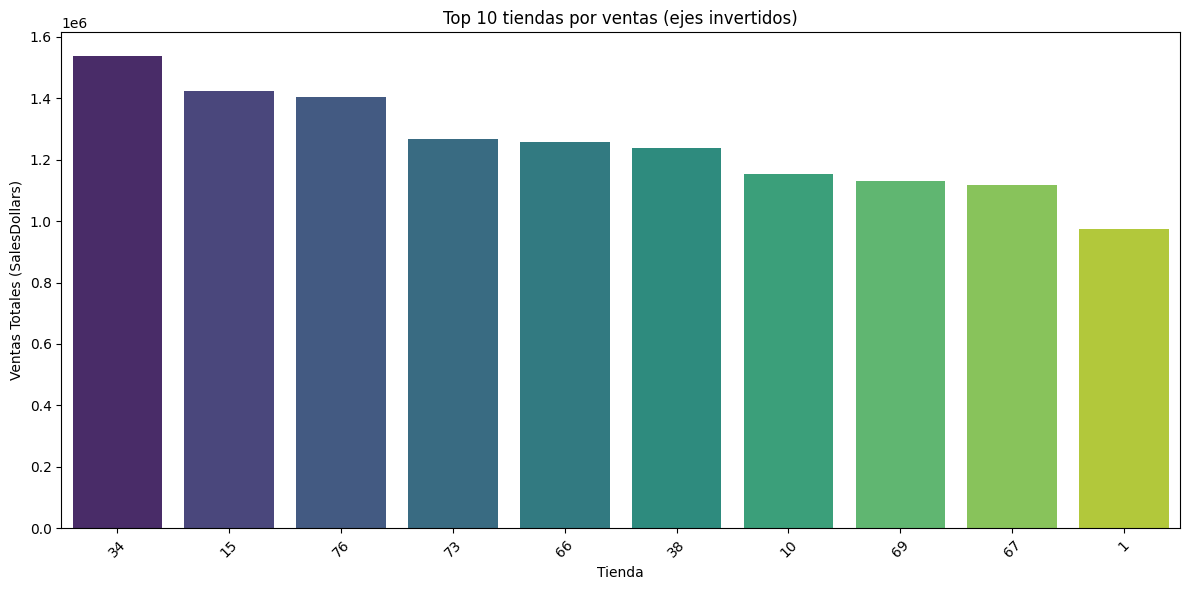

In [26]:
# Top 10 productos por ventas
top_products = df.groupby('Description')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Top 10 vendors
top_vendors = df.groupby('VendorName')['SalesDollars'].sum().sort_values(ascending=False).head(10)

# Top 10 tiendas
top_stores = df.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False).head(10)


# Visualización de top productos
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 productos por ventas")
plt.xlabel("Ventas Totales (SalesDollars)")
plt.ylabel("Producto")
plt.show()


# Visualización de top productos
plt.figure(figsize=(12,6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")
plt.title("Top 10 Vendedores por ventas")
plt.xlabel("Ventas Totales (SalesDollars)")
plt.ylabel("Vendedor")
plt.show()

# Visualización de top tiendas con ejes invertidos (barras verticales)
plt.figure(figsize=(12,6))
sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette="viridis")
plt.title("Top 10 tiendas por ventas (ejes invertidos)")
plt.xlabel("Tienda")
plt.ylabel("Ventas Totales (SalesDollars)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Outliers

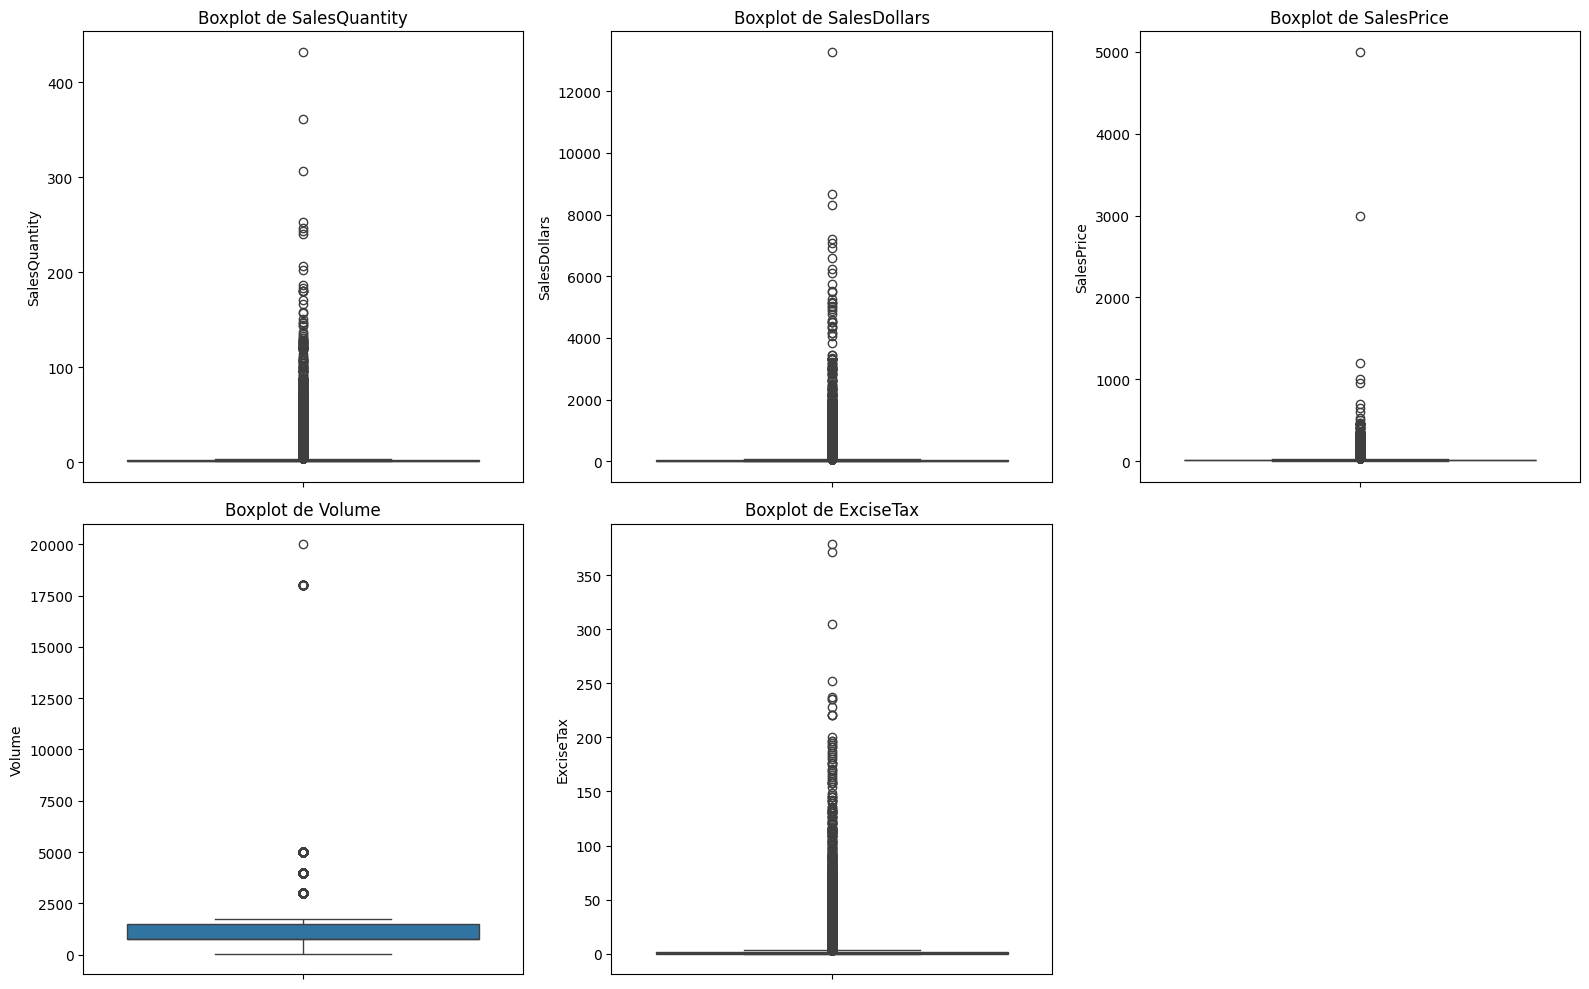

In [27]:
# Boxplots de variables numéricas
num_cols = ['SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'ExciseTax']
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()